In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

# Load dataset
data_sup = pd.read_csv('cleaned_recipes_.csv')
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [3]:
data_sup.head(10)

,RecipeId,Name,CookTime,Description,RecipeServings,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,HealthStatus
0,38,Low-Fat Berry Blue Frozen Dessert,1 day,Make and share this Low-Fat Berry Blue Frozen ...,4.00,Frozen Desserts,"['4', '1/4', '1', '1']","blueberries, granulated sugar, vanilla yogurt,...",4.50,42.73,0.62,0.33,2.00,7.45,9.28,0.90,7.55,0.80,"['Toss 2 cups berries with sugar.', 'Let stand...",Healthy
1,39,Biryani,25 minutes,Make and share this Biryani recipe from Food.com.,6.00,Chicken Breast,[],"saffron, milk, hot green chili peppers, onions...",3.00,185.12,9.80,2.77,62.13,61.40,14.07,1.50,3.40,10.57,['Soak saffron in warm milk for 5 minutes and ...,Healthy
2,40,Best Lemonade,5 minutes,This is from one of my first Good House Keepi...,4.00,Beverages,[],"sugar, lemons, rind of, lemon, zest of, fresh ...",4.50,77.78,0.05,0.00,0.00,0.45,20.38,0.10,19.30,0.07,"['Into a 1 quart Jar with tight fitting lid, p...",Unhealthy
3,41,Carina's Tofu-Vegetable Kebabs,20 minutes,This dish is best prepared a day in advance to...,2.00,Soy/Tofu,"['12', '1', '2', '1', '10', '1', '3', '2', '2'...","extra firm tofu, eggplant, zucchini, mushrooms...",4.50,268.05,12.00,1.90,0.00,779.30,32.10,8.65,16.05,14.65,"['Drain the tofu, carefully squeezing out exce...",Unhealthy
4,42,Cabbage Soup,30 minutes,Make and share this Cabbage Soup recipe from F...,4.00,Vegetable,"['46', '4', '1', '2', '1']","plain tomato juice, cabbage, onion, carrots, c...",4.50,25.90,0.10,0.03,0.00,239.82,6.28,1.20,4.42,1.07,['Mix everything together and bring to a boil....,Healthy
5,43,Best Blackbottom Pie,2 hours,Make and share this Best Blackbottom Pie recip...,8.00,Pie,[],"graham cracker crumbs, sugar, butter, sugar, c...",1.00,54.74,2.41,1.36,11.79,33.45,7.25,0.23,5.31,0.88,"['Graham Cracker Crust: In small bowl, combine...",Healthy
6,44,Warm Chicken A La King,3 minutes,I copied this one out of a friend's book so ma...,2.00,Chicken,[],"chicken, butter, flour, milk, celery, button m...",5.00,447.75,33.40,15.95,202.90,278.60,14.55,1.55,2.50,22.65,"['Melt 1 1/2 ozs butter, add the flour and coo...",Unhealthy
7,45,Buttermilk Pie With Gingersnap Crumb Crust,50 minutes,Make and share this Buttermilk Pie With Ginger...,8.00,Pie,"['3/4', '1', '1', '2', '3', '1/4', '1', '1/2',...","sugar, margarine, egg, flour, salt, buttermilk...",4.00,28.50,0.89,0.21,3.06,35.23,4.69,0.06,3.09,0.53,"['Preheat oven to 350°F.', 'Make pie crust, us...",Healthy
8,48,Boston Cream Pie,unknown,Make and share this Boston Cream Pie recipe fr...,8.00,Pie,"['1/2', '2 1/4', '3', '1', '1 1/2', '1/3', '1 ...","margarine, cake flour, baking powder, salt, su...",2.00,86.03,4.55,1.61,13.24,90.29,10.50,0.20,5.78,1.10,"['Beat egg whites until soft peaks form.', 'Gr...",Healthy
9,49,Chicken Breasts Lombardi,30 minutes,Make and share this Chicken Breasts Lombardi r...,6.00,Chicken Breast,"['2', '2', '12', '1/2', '1/3', '3/4', '1/2', '...","fresh mushrooms, butter, boneless skinless chi...",5.00,104.62,4.15,2.17,33.83,141.48,2.28,0.10,0.33,9.65,['Cook mushrooms in 2 tbsp butter in a large ...,Healthy


In [4]:
# Define a cleaning function
def clean_ingredients(ingredient_str):
    # Remove 'c (' and ')', and clean double quotes and spaces
    ingredient_str = ingredient_str.replace('c(', '').replace(')', '')  # Remove 'c (' and ')'
    ingredient_str = ingredient_str.replace('"', '')  # Remove double quotes
    ingredient_str = ' '.join(item.strip() for item in ingredient_str.split(','))  # Clean spaces and join
    return ingredient_str

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

scaled_data = data_sup.copy()
 
# Extract only the relevant features

# Apply the cleaning function to the Ingredients column
Ingredients = scaled_data['RecipeIngredientParts']
labels = scaled_data['HealthStatus']


# Output the cleaned Ingredients
Ingredients


0         blueberries, granulated sugar, vanilla yogurt,...
1         saffron, milk, hot green chili peppers, onions...
2         sugar, lemons, rind of, lemon, zest of, fresh ...
3         extra firm tofu, eggplant, zucchini, mushrooms...
4         plain tomato juice, cabbage, onion, carrots, c...
                                ...                        
339116    lemon wedge, granulated sugar, cognac, brandy,...
339117    all-purpose flour, brown sugar, butter, ground...
339118    fresh ginger, unsalted butter, dark brown suga...
339119    Dijon mustard, garlic, peppercorns, shallot, c...
339120            half-and-half, heavy cream, brandy, sugar
Name: RecipeIngredientParts, Length: 339121, dtype: object

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Ingredients)


In [7]:
# Modèle KNN
knn = KNeighborsClassifier( metric='cosine')
knn.fit(X, labels)

KNeighborsClassifier(metric='cosine')

In [14]:
# Nouvelle recette utilisateur
user_recipe = ["eggs onion"]
user_vector = vectorizer.transform(user_recipe)
# Find the Most Similar Recipe Index

_, index = knn.kneighbors(user_vector)
most_similar_index = index[0][2]
# Return the Index
print(f"Index of the nearest recipe: {most_similar_index}")

Index of the nearest recipe: 251970


In [15]:
# Prédiction
prediction = knn.predict(user_vector)
print(f"La recette est : {prediction[0]}")
most_similar_row = scaled_data.iloc[most_similar_index]
print(f"La recette la plus similaire : {most_similar_row['RecipeIngredientParts']}")




La recette est : Healthy
La recette la plus similaire : eggs, ketchup, onion


In [10]:
from sklearn.utils import resample

X_test_sample, y_test_sample = resample(X, labels, n_samples=1000, random_state=42)
accuracy = knn.score(X_test_sample, y_test_sample)


KeyboardInterrupt: 

In [179]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.00%


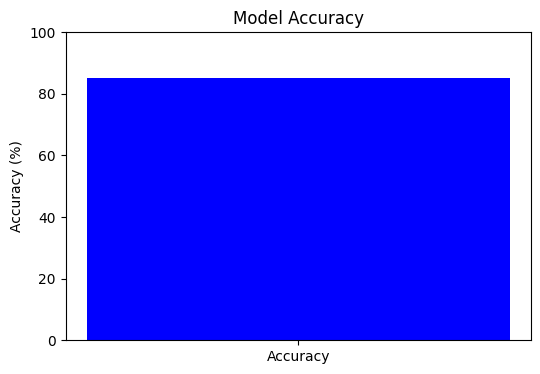

In [180]:
# Plot Accuracy
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy"], [accuracy * 100], color='blue')
plt.ylim(0, 100)
plt.title("Model Accuracy")
plt.ylabel("Accuracy (%)")
plt.show()

In [11]:
import joblib

joblib.dump(vectorizer, 'supervise_vectorizer_.pkl')

joblib.dump(knn, 'knn_supervised_model_.pkl')


['knn_supervised_model_.pkl']